In [1]:
import random

In [3]:
class Dice:
    
    def __init__(self, sides):
        self.sides = sides
        
    def roll(self):
        die_one = random.randint(1, self.sides)
        die_two = random.randint(1, self.sides)
        result = die_one + die_two
        if result > 6:
            return die_one, die_two, 1
        return die_one, die_two, 0

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
dice = Dice(6)
dice.roll()

(5, 4, 1)

In [6]:
dice.roll()

(2, 2, 0)

In [20]:
results = [dice.roll() for _ in range(20)]
games = np.array(results)
df = pd.DataFrame(games, columns=["First", "Second", "Win"])

In [21]:
df

,First,Second,Win
0,3,2,0
1,3,5,1
2,4,2,0
3,3,5,1
4,1,3,0
5,1,3,0
6,1,3,0
7,5,4,1
8,1,2,0
9,5,2,1


In [22]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(df[['First', 'Second']], df['Win'])

GaussianNB()

## Wow the model can predict a winner based on the first die

In [30]:
gnb.predict([1])[0]

0

In [ ]:
gnb.predict([1, 6])[0]

In [24]:
gnb.predict_proba([3, 2])

array([[ 0.87615431,  0.12384569]])

In [25]:
%matplotlib inline

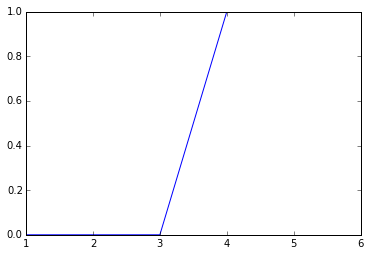

In [26]:
plt.plot([1, 2, 3, 4, 5, 6], [gnb.predict(x) for x in range(1, 7)])